In [22]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('fetal_health.csv')

print(df.shape)
df.head()

(2126, 22)


baseline value  accelerations  ...  histogram_tendency  fetal_health
0           120.0          0.000  ...                 1.0           2.0
1           132.0          0.006  ...                 0.0           1.0
2           133.0          0.003  ...                 0.0           1.0
3           134.0          0.003  ...                 1.0           1.0
4           132.0          0.007  ...                 1.0           1.0

[5 rows x 22 columns]

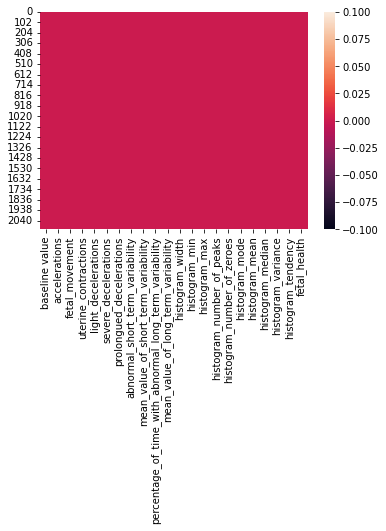

In [40]:
sns.heatmap(df.isna())
plt.show()

In [41]:
df = df.dropna()

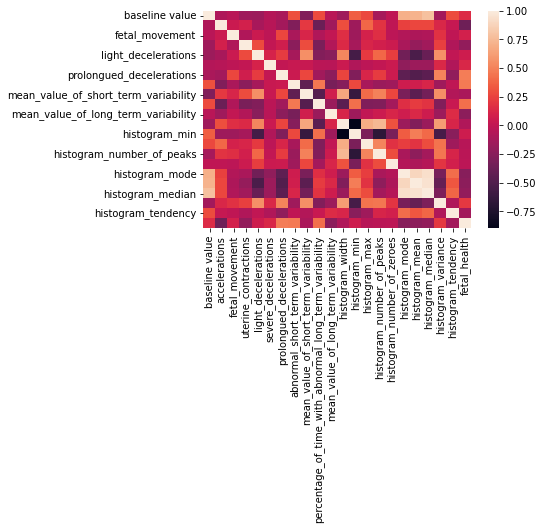

In [42]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


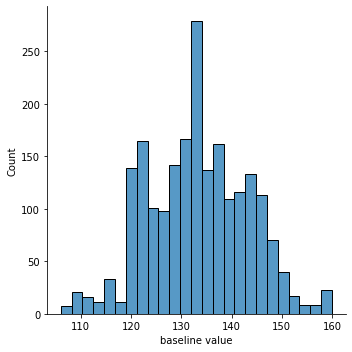

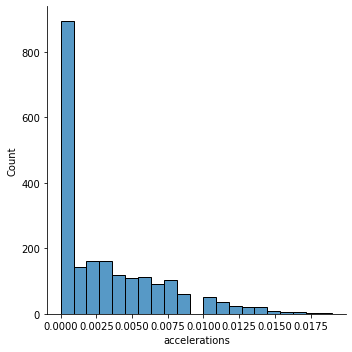

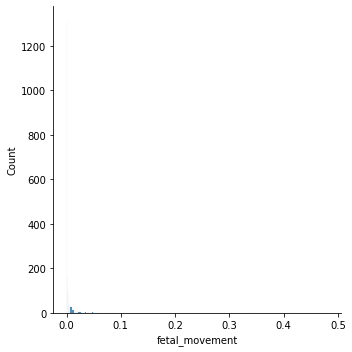

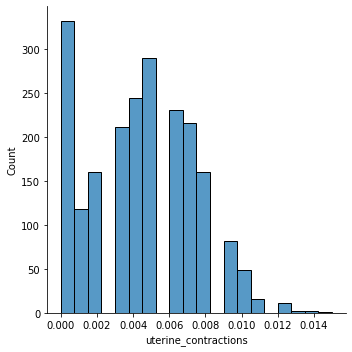

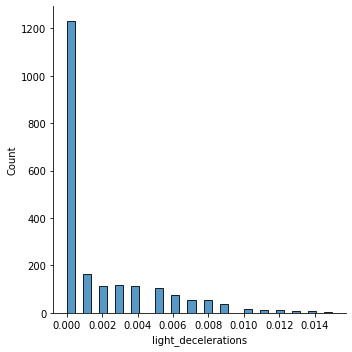

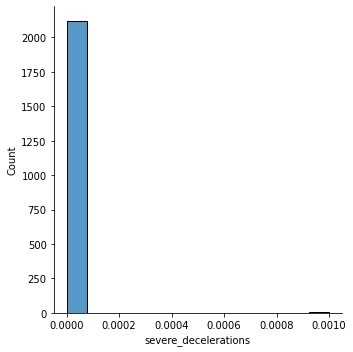

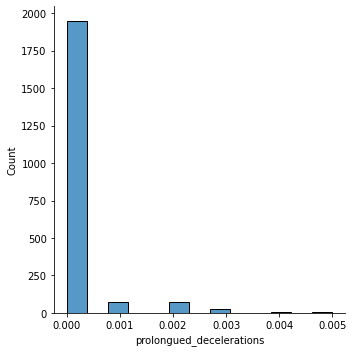

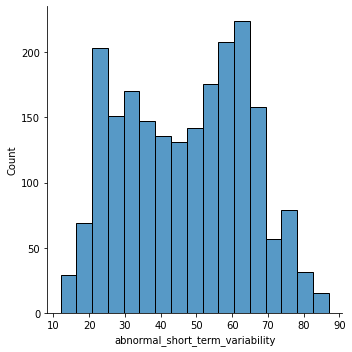

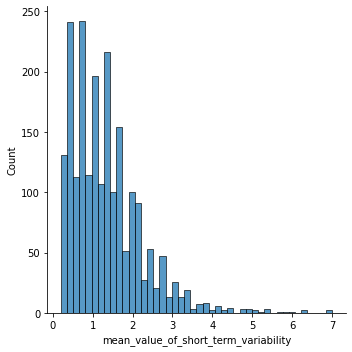

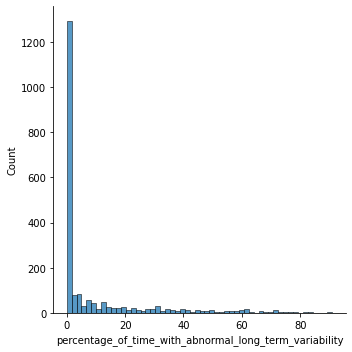

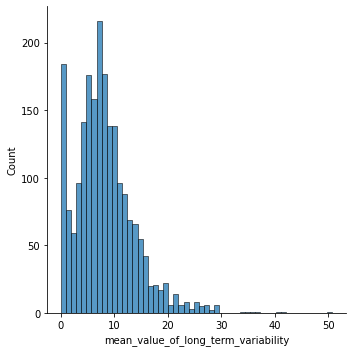

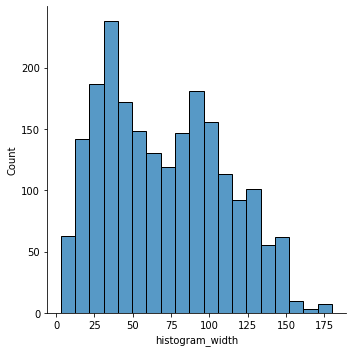

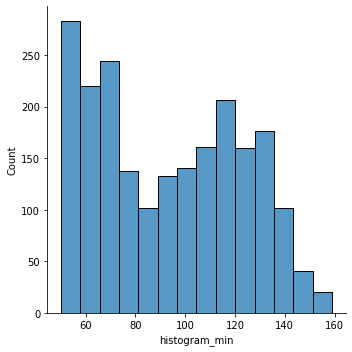

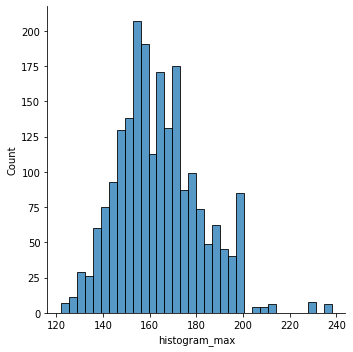

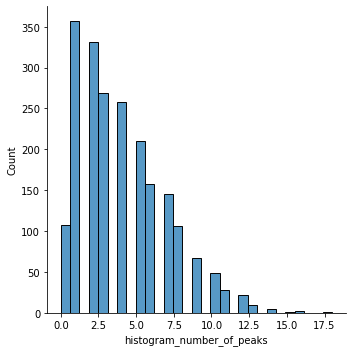

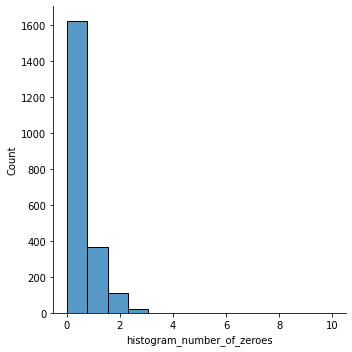

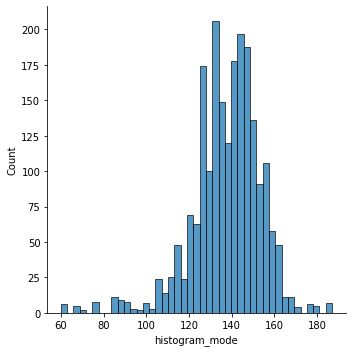

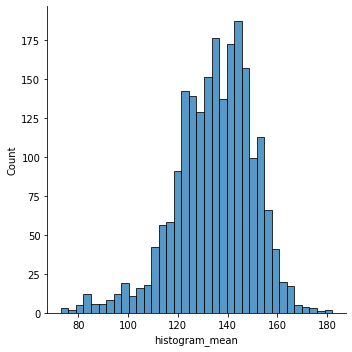

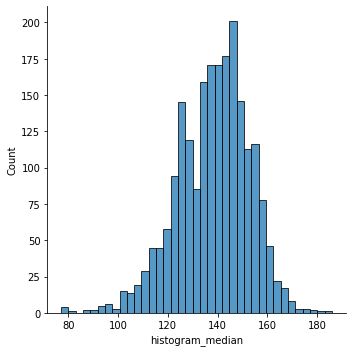

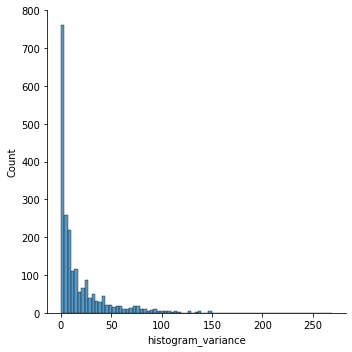

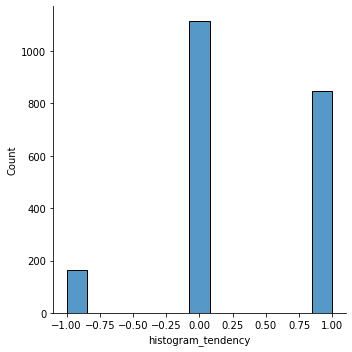

In [45]:
for title in df.columns.values.tolist()[:-1] :
    sns.displot(df, x=title)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


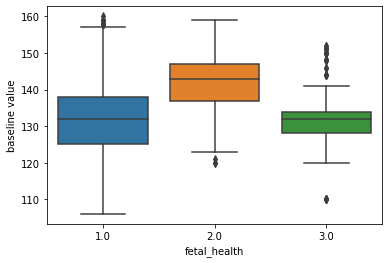

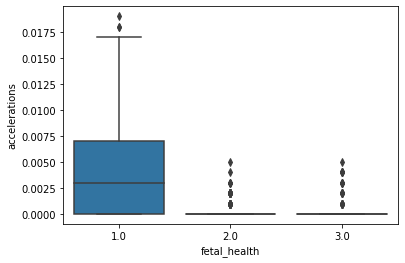

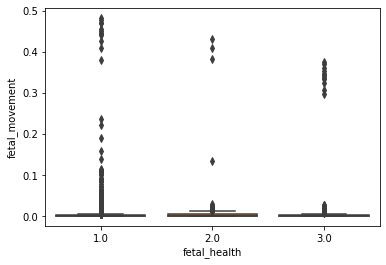

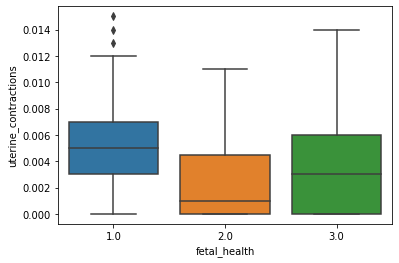

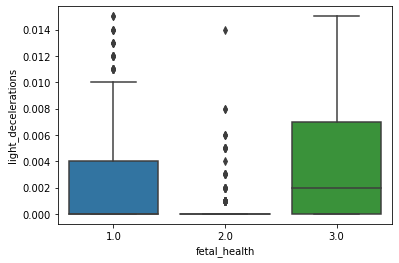

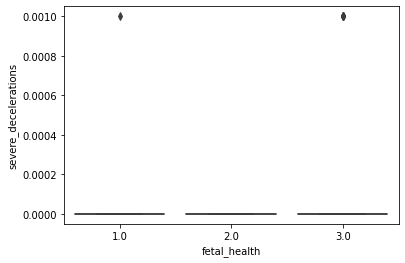

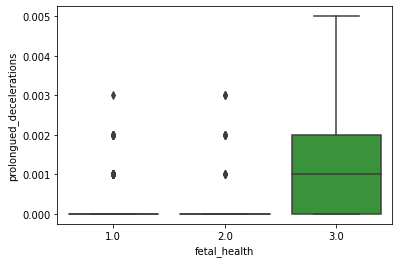

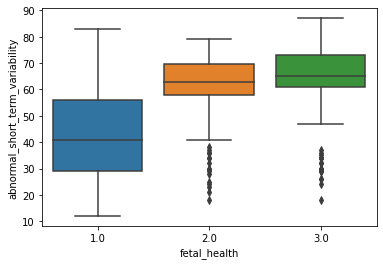

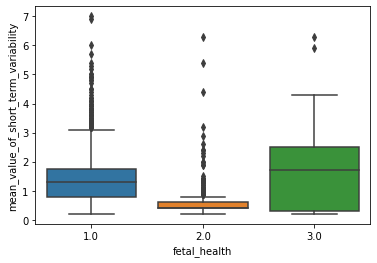

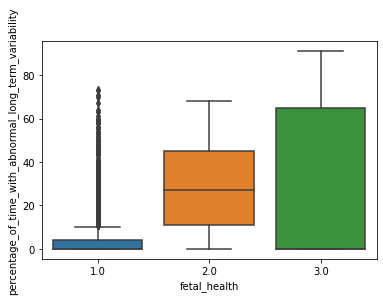

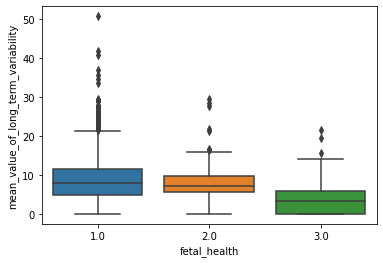

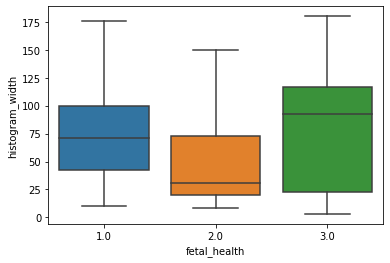

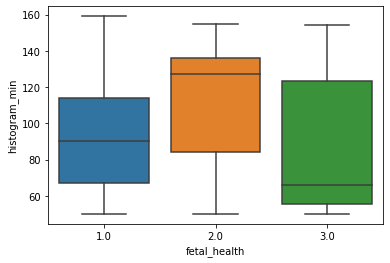

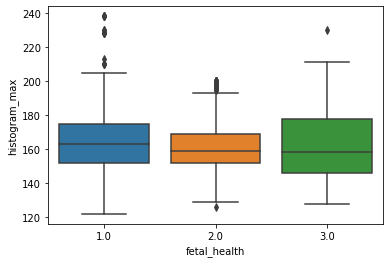

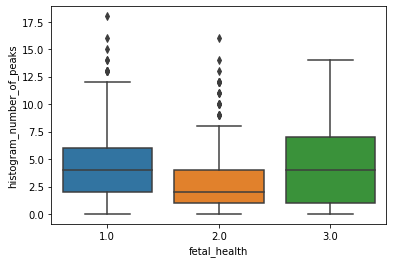

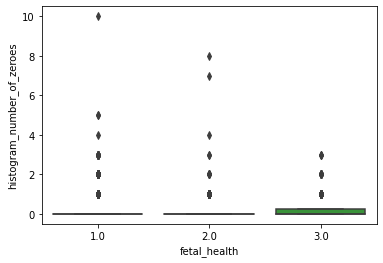

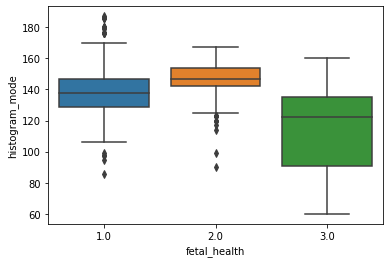

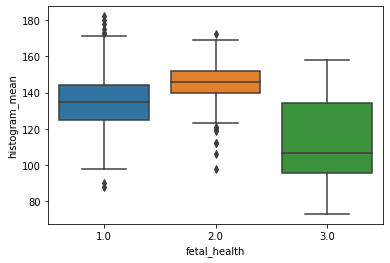

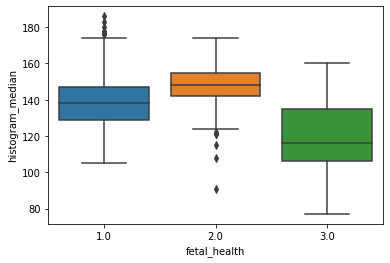

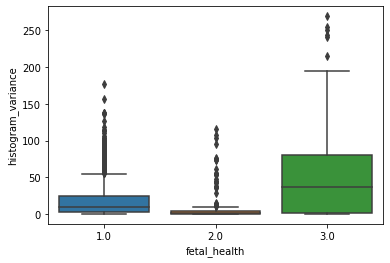

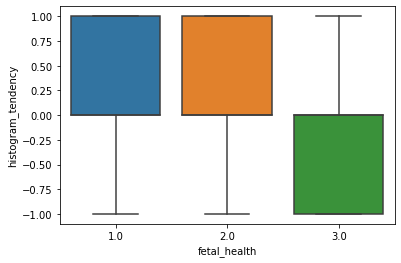

In [47]:
for title in df.columns.values.tolist()[:-1] :
    fig = plt.figure()
    ax = sns.boxplot(x="fetal_health", y=title, data=df)

In [54]:
columns = dict(zip(list(range(df.shape[1])), df.columns.values.tolist()))
fetal_health = df['fetal_health']

df = pd.DataFrame(StandardScaler().fit_transform(df)).rename(columns = columns)
df['fetal_health'] = fetal_health

In [55]:
X = df.drop(['fetal_health'], axis=1).values
y = df['fetal_health'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import  export_graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
parameters_knn = {  'model__algorithm' : ['brute'],
                    'model__leaf_size' : [30,50,70,90,110],
                    'model__metric' : ['minkowski'],
                    'model__p' : [1],
                    'model__n_neighbors' : [3,5,11,19],
                    'model__weights' : ['uniform', 'distance'],
                    'model__n_jobs' : [-1]
                 }

parameters_rfc =  { "model__n_estimators": [100,200],
                    "model__max_features": ["auto", "sqrt"],
                    "model__max_depth":[10,20],
                    "model__min_samples_split": [2, 5],
                    "model__min_samples_leaf": [1, 2],
                    "model__bootstrap": [True, False],
                    "model__criterion": ["gini"],
                    "model__random_state" : [42] 
                  }

parameters_ab =  { "model__algorithm": [ 'SAMME.R',  'SAMME'],
                    "model__learning_rate":[0.5,1,2,3],
                    "model__n_estimators": [50,100,150,200,300],
                    "model__random_state" : [42] 
                 }

parameters_svc = { 'model__kernel' : ['linear','rbf'],
                   'model__C' : [1,10,100],
                   'model__random_state' : [42],
                   'model__gamma' : ['scale','auto']
                 }

parameters_dt =  { "model__max_depth": np.arange(1,10),
                   "model__min_samples_leaf": [1, 5, 10, 20],
                   "model__min_samples_split": np.arange(2, 11),
                   "model__criterion": ["gini", "entropy"],
                   "model__random_state" : [42]
                 }

In [33]:
def apply_ml_model(ml_model,parameters, X_train, y_train):
    steps = [
        ('scalar', StandardScaler()),
        ('model', ml_model)
    ]
    model_pipe = Pipeline(steps)

    ml_model = GridSearchCV(model_pipe, parameters, cv = 3, n_jobs = -1)
    ml_model = ml_model.fit(X_train, y_train.ravel())
    
    y_pred_train = ml_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    y_pred_test = ml_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    print("confusion_matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap = 'viridis', fmt='.0f')
    plt.show()
    print("Training set: ", accuracy_train)
    print("Test set: ", accuracy_test)
    print(classification_report(y_test, y_pred_test))
    print(ml_model.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


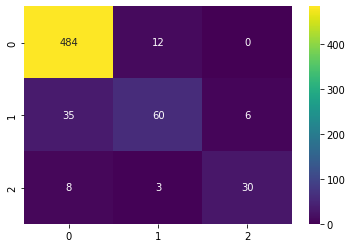

              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       496
         2.0       0.80      0.59      0.68       101
         3.0       0.83      0.73      0.78        41

    accuracy                           0.90       638
   macro avg       0.85      0.77      0.80       638
weighted avg       0.89      0.90      0.89       638



In [58]:
knn = KNeighborsClassifier(n_neighbors=6, algorithm='brute')
knn.fit(X_train, y_train)
predknn = knn.predict(X_test)
sns.heatmap(confusion_matrix(y_test, predknn), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, predknn))

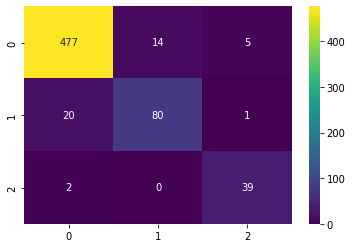

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       496
         2.0       0.85      0.79      0.82       101
         3.0       0.87      0.95      0.91        41

    accuracy                           0.93       638
   macro avg       0.89      0.90      0.90       638
weighted avg       0.93      0.93      0.93       638



In [59]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
preddectree = dectree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, preddectree), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, preddectree))

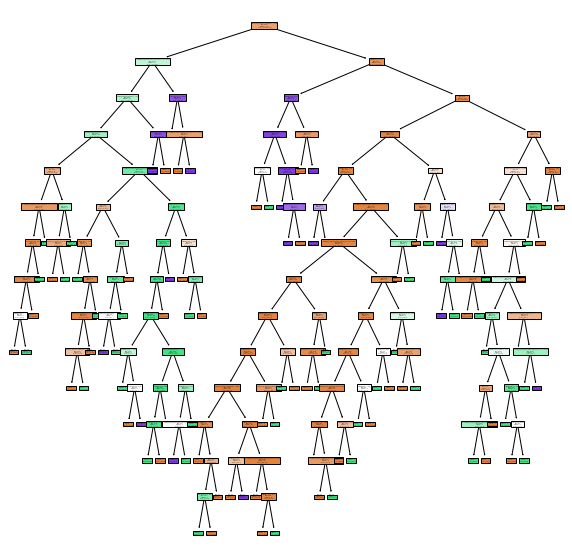

In [62]:
plt.figure(figsize = (10, 10))
plot_tree(dectree, feature_names = df.columns.values.tolist(), filled = True)
plt.show()

confusion_matrix


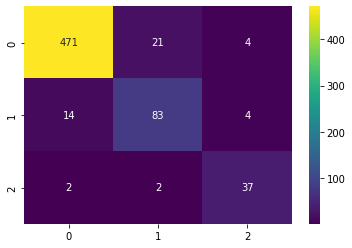

Training set:  0.9670698924731183
Test set:  0.9263322884012539
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       496
         2.0       0.78      0.82      0.80       101
         3.0       0.82      0.90      0.86        41

    accuracy                           0.93       638
   macro avg       0.86      0.89      0.87       638
weighted avg       0.93      0.93      0.93       638

{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'model__random_state': 42}


In [66]:
ml_model = SVC()
apply_ml_model(ml_model,parameters_svc, X_train, y_train)

confusion_matrix


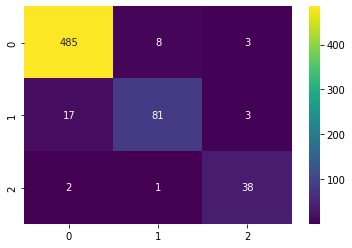

Training set:  0.9986559139784946
Test set:  0.9467084639498433
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       496
         2.0       0.90      0.80      0.85       101
         3.0       0.86      0.93      0.89        41

    accuracy                           0.95       638
   macro avg       0.91      0.90      0.90       638
weighted avg       0.95      0.95      0.95       638

{'model__bootstrap': False, 'model__criterion': 'gini', 'model__max_depth': 20, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100, 'model__random_state': 42}


In [67]:
ml_model = RandomForestClassifier()
apply_ml_model(ml_model,parameters_rfc, X_train, y_train)

confusion_matrix


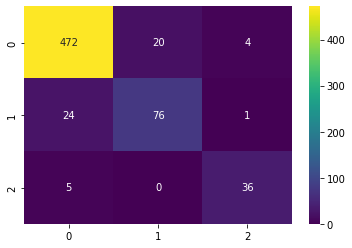

Training set:  0.9314516129032258
Test set:  0.9153605015673981
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       496
         2.0       0.79      0.75      0.77       101
         3.0       0.88      0.88      0.88        41

    accuracy                           0.92       638
   macro avg       0.87      0.86      0.87       638
weighted avg       0.91      0.92      0.91       638

{'model__algorithm': 'SAMME', 'model__learning_rate': 0.5, 'model__n_estimators': 200, 'model__random_state': 42}


In [63]:
ml_model = AdaBoostClassifier()
apply_ml_model(ml_model,parameters_ab, X_train, y_train)